# <center align> Boston House Prices - Nerual Networks

##  Import Libraries

In [1]:
# Data analysis and visualization
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Preprocessing and evaluation
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

## Load Data

In [2]:
(X_train , y_train), (X_test , y_test) = tf.keras.datasets.boston_housing.load_data(
path = 'boston_housing_npz',
test_split = 0.2,
seed = 42
)

57026/57026 [==============================] - 0s 0us/step


## Exploratory Data Analysis

### Initial Observation

In [3]:
# Checking the data shape and type
(X_train.shape, type(X_train)), (X_test.shape, type(X_test)), (y_train.shape, type(y_train)), (y_test.shape, type(y_test))

(((404, 13), numpy.ndarray),
 ((102, 13), numpy.ndarray),
 ((404,), numpy.ndarray),
 ((102,), numpy.ndarray))

In [4]:
# Converting Data to DataFrame
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)
# Preview the training data
X_train_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
5,0.10153,0.0,12.83,0.0,0.437,6.279,74.5,4.0522,5.0,398.0,18.7,373.66,11.97
6,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33
7,0.29090,0.0,21.89,0.0,0.624,6.174,93.6,1.6119,4.0,437.0,21.2,388.08,24.16
8,4.03841,0.0,18.10,0.0,0.532,6.229,90.7,3.0993,24.0,666.0,20.2,395.33,12.87
9,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33


In [5]:
# View summary of datasets
X_train_df.info()
print('_'*40)
y_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [6]:
# distribution of numerical feature values across the samples
X_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.789989,11.568069,11.214059,0.069307,0.554524,6.284824,69.119307,3.792258,9.660891,408.960396,18.481931,356.293020,12.825520
std,9.132761,24.269648,6.925462,0.254290,0.116408,0.723759,28.034606,2.142651,8.736073,169.685166,2.157322,92.058615,7.308772
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.920000
25%,0.081960,0.000000,5.190000,0.000000,0.452000,5.878750,45.475000,2.097050,4.000000,281.000000,17.400000,375.085000,7.092500
50%,0.262660,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.167500,5.000000,330.000000,19.100000,391.305000,11.560000
75%,3.717875,12.500000,18.100000,0.000000,0.624000,6.620500,94.425000,5.118000,24.000000,666.000000,20.200000,395.810000,17.167500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Preprocessing

In [7]:
# Create column transformer
ct = make_column_transformer(
(MinMaxScaler(), [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12])
)
# Normalization and data type change
X_train = ct.fit_transform(X_train).astype('float32')
X_test = ct.transform(X_test).astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
# Distribution of X_train feature values after normalization
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.042528,0.115681,0.394210,0.348815,0.521906,0.681970,0.241618,0.376561,0.423589,0.625738,0.897607,0.302511
std,0.102650,0.242696,0.253866,0.239522,0.138678,0.288719,0.194973,0.379829,0.323827,0.229502,0.232131,0.202740
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000850,0.000000,0.173387,0.137860,0.444098,0.438466,0.087361,0.130435,0.179389,0.510638,0.944992,0.143481
50%,0.002881,0.000000,0.338343,0.314815,0.507569,0.768280,0.184767,0.173913,0.272901,0.691489,0.985892,0.267406
75%,0.041717,0.125000,0.646628,0.491770,0.586223,0.942585,0.362255,1.000000,0.914122,0.808511,0.997252,0.422954
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model, Predict, Evaluate

In [8]:
# Reserve data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((363, 12), (41, 12), (363,), (41,))

## Creating the Model and Optimizing the Learning Rate

### learning rate = 0.01, batch_size = 32, dense_layers = 2, hidden_units for Dense_1 layer= 10, hidden_units for Dense_2 layer = 100

In [187]:
# Set random seed
tf.random.set_seed(42)
# Building the model

model = tf.keras.Sequential([tf.keras.layers.Dense(units=50, activation='relu', input_shape=(X_train.shape[1],), name='Dense_1'), 
                             tf.keras.layers.Dense(units=100, activation='relu', name='Dense_2'),
                             tf.keras.layers.Dense(units=200, activation='relu', name='Dense_3'),
                             tf.keras.layers.Dense(units=1, name='Prediction') ])

# Compiling the model
model.compile(loss = tf.keras.losses.mean_squared_error, 
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics = ['mae'])

# Training the model
history = model.fit(X_train, y_train, batch_size=32, epochs=300, validation_data=(X_val, y_val) )

Epoch 1/300
12/12 [==============================] - 1s 14ms/step - loss: 484.0008 - mae: 19.8613 - val_loss: 429.0737 - val_mae: 17.7007
Epoch 2/300
12/12 [==============================] - 0s 4ms/step - loss: 213.4301 - mae: 11.5949 - val_loss: 174.0150 - val_mae: 9.6876
Epoch 3/300
12/12 [==============================] - 0s 4ms/step - loss: 112.3997 - mae: 7.9995 - val_loss: 124.8562 - val_mae: 8.3690
Epoch 4/300
12/12 [==============================] - 0s 4ms/step - loss: 88.9982 - mae: 7.0234 - val_loss: 95.4577 - val_mae: 7.3058
Epoch 5/300
12/12 [==============================] - 0s 4ms/step - loss: 71.2768 - mae: 6.1934 - val_loss: 93.4157 - val_mae: 6.7142
Epoch 6/300
12/12 [==============================] - 0s 4ms/step - loss: 58.9671 - mae: 5.4144 - val_loss: 70.9837 - val_mae: 5.8032
Epoch 7/300
12/12 [==============================] - 0s 4ms/step - loss: 49.7104 - mae: 4.9668 - val_loss: 54.5766 - val_mae: 5.2785
Epoch 8/300
12/12 [==============================] - 0s 4ms

12/12 [==============================] - 0s 3ms/step - loss: 13.7032 - mae: 2.5263 - val_loss: 12.1369 - val_mae: 2.6669
Epoch 63/300
12/12 [==============================] - 0s 3ms/step - loss: 13.8712 - mae: 2.5235 - val_loss: 14.4947 - val_mae: 2.7996
Epoch 64/300
12/12 [==============================] - 0s 3ms/step - loss: 13.5572 - mae: 2.5074 - val_loss: 13.9169 - val_mae: 2.7648
Epoch 65/300
12/12 [==============================] - 0s 4ms/step - loss: 13.7279 - mae: 2.5380 - val_loss: 13.9243 - val_mae: 2.7314
Epoch 66/300
12/12 [==============================] - 0s 4ms/step - loss: 12.9656 - mae: 2.4339 - val_loss: 12.7177 - val_mae: 2.6109
Epoch 67/300
12/12 [==============================] - 0s 4ms/step - loss: 12.5314 - mae: 2.4591 - val_loss: 12.3841 - val_mae: 2.7809
Epoch 68/300
12/12 [==============================] - 0s 4ms/step - loss: 12.9056 - mae: 2.5356 - val_loss: 23.0011 - val_mae: 3.6315
Epoch 69/300
12/12 [==============================] - 0s 3ms/step - loss: 1

12/12 [==============================] - 0s 3ms/step - loss: 8.7254 - mae: 2.1791 - val_loss: 9.9497 - val_mae: 2.5282
Epoch 124/300
12/12 [==============================] - 0s 3ms/step - loss: 7.5635 - mae: 2.0284 - val_loss: 10.5540 - val_mae: 2.3782
Epoch 125/300
12/12 [==============================] - 0s 3ms/step - loss: 8.8062 - mae: 2.2002 - val_loss: 12.2857 - val_mae: 2.9499
Epoch 126/300
12/12 [==============================] - 0s 4ms/step - loss: 7.7374 - mae: 2.0862 - val_loss: 11.3106 - val_mae: 2.4363
Epoch 127/300
12/12 [==============================] - 0s 4ms/step - loss: 8.0809 - mae: 2.0829 - val_loss: 11.0754 - val_mae: 2.3940
Epoch 128/300
12/12 [==============================] - 0s 4ms/step - loss: 8.0895 - mae: 2.1376 - val_loss: 14.9077 - val_mae: 3.2503
Epoch 129/300
12/12 [==============================] - 0s 3ms/step - loss: 7.6466 - mae: 2.0544 - val_loss: 13.4364 - val_mae: 3.0865
Epoch 130/300
12/12 [==============================] - 0s 3ms/step - loss: 7.

12/12 [==============================] - 0s 4ms/step - loss: 6.4410 - mae: 1.9285 - val_loss: 11.7520 - val_mae: 2.4653
Epoch 185/300
12/12 [==============================] - 0s 4ms/step - loss: 6.0321 - mae: 1.8659 - val_loss: 9.3121 - val_mae: 2.4364
Epoch 186/300
12/12 [==============================] - 0s 3ms/step - loss: 6.7389 - mae: 1.9558 - val_loss: 14.2640 - val_mae: 2.6190
Epoch 187/300
12/12 [==============================] - 0s 5ms/step - loss: 5.7346 - mae: 1.8192 - val_loss: 11.2366 - val_mae: 2.8727
Epoch 188/300
12/12 [==============================] - 0s 3ms/step - loss: 5.3596 - mae: 1.7920 - val_loss: 13.1104 - val_mae: 3.1097
Epoch 189/300
12/12 [==============================] - 0s 3ms/step - loss: 6.9269 - mae: 2.0527 - val_loss: 10.9986 - val_mae: 2.4354
Epoch 190/300
12/12 [==============================] - 0s 5ms/step - loss: 5.8770 - mae: 1.8428 - val_loss: 10.4981 - val_mae: 2.3708
Epoch 191/300
12/12 [==============================] - 0s 4ms/step - loss: 6.

12/12 [==============================] - 0s 6ms/step - loss: 5.0679 - mae: 1.7177 - val_loss: 11.4701 - val_mae: 2.3532
Epoch 246/300
12/12 [==============================] - 0s 7ms/step - loss: 4.8680 - mae: 1.6671 - val_loss: 11.2641 - val_mae: 2.4052
Epoch 247/300
12/12 [==============================] - 0s 5ms/step - loss: 5.3404 - mae: 1.7704 - val_loss: 11.0741 - val_mae: 2.3833
Epoch 248/300
12/12 [==============================] - 0s 5ms/step - loss: 4.5627 - mae: 1.6158 - val_loss: 12.3020 - val_mae: 2.9970
Epoch 249/300
12/12 [==============================] - 0s 9ms/step - loss: 5.9493 - mae: 1.8846 - val_loss: 9.2692 - val_mae: 2.3857
Epoch 250/300
12/12 [==============================] - 0s 4ms/step - loss: 4.8264 - mae: 1.6866 - val_loss: 9.7398 - val_mae: 2.5577
Epoch 251/300
12/12 [==============================] - 0s 4ms/step - loss: 4.8676 - mae: 1.6517 - val_loss: 10.0534 - val_mae: 2.3020
Epoch 252/300
12/12 [==============================] - 0s 10ms/step - loss: 5.

## Model Evaluation

In [188]:
# Preview the mean value of training and validation data
y_train.mean(), y_val.mean()

(22.235537, 24.89756)

In [189]:
# Evaluate the model on the test data
print("Evaluation on Test data \n")

loss, mae = model.evaluate(X_test, y_test, batch_size=32)
print(f"\nModel loss on test set: {loss}")
print(f"Model mean squared error on test set: {(mae):.2f}")

Evaluation on Test data 

4/4 [==============================] - 0s 2ms/step - loss: 10.6215 - mae: 2.3101

Model loss on test set: 10.621499061584473
Model mean squared error on test set: 2.31


## Visualizing the Loss

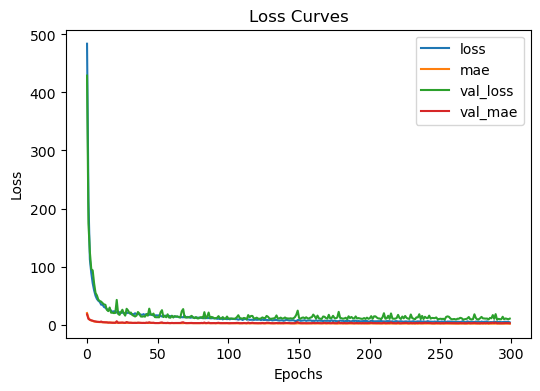

In [190]:
# Plot the loss curves
pd.DataFrame(history.history).plot(figsize=(6, 4), xlabel="Epochs", ylabel="Loss", title='Loss Curves')
plt.show()

## Model Prediction

In [191]:
# Make predictions
y_pred = model.predict(X_test)

# View the first prediction
y_pred[0]

4/4 [==============================] - 0s 5ms/step


array([21.476456], dtype=float32)

In [113]:
y_test[0]

22.4

In [192]:
X_test[0]

array([0.00237013, 0.        , 0.3713343 , 0.21399178, 0.43035063,
       0.52420187, 0.22890942, 0.13043478, 0.17175573, 0.63829786,
       0.9849715 , 0.39140084], dtype=float32)